In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
np.random.seed(seed=1)
N = 100         #전체 데이터 갯수
K = 3           #

T3 = np.zeros((N,3), dtype=np.uint8)
T2 = np.zeros((N,2), dtype=np.uint8)
X  = np.zeros((N,2))
X_range0 = [-3,3]
X_range1 = [-3,3]

Mu = np.array([[-0.5,-0.5], [0.5, 1], [1, -0.5]])
Sig = np.array([[0.7, 0.7], [0.8, 0.3], [0.3,0.8]])
Pi = np.array([0.4,0.8,1])

for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T3[n,k] = 1
            break
    for k in range(2) :
        X[n,k] = np.random.randn() * Sig[T3[n,:] ==1, k] + Mu[T3[n,:]==1,k]
        
T2[:,0] = T3[:,0]
T2[:,1] = T3[:,1] | T3[:,2]

print(X[:5,:])
print(T2[:5,:])
print(T3[:5,:])


[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]
[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]
[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


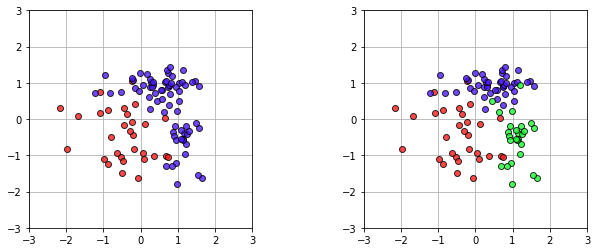

In [6]:
def show_data2(x,t):
    wk, K = t.shape
    #c = [[0.5,0.5,0.5], [1,1,1], [0,0,0]]
    c = [[1,0.1,0.1], [0.3,0.1,1],[0.1,1,0.2]]
    for k in range(K):
        plt.plot(x[t[:,k]==1,0], x[t[:,k]==1,1],
                 linestyle='none', markeredgecolor='black', marker='o',
                 color = c[k], alpha=0.8)
        plt.grid(True)
        
plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
show_data2(X,T2)
plt.xlim(X_range0)
plt.ylim(X_range1)

plt.subplot(1,2,2)
show_data2(X,T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

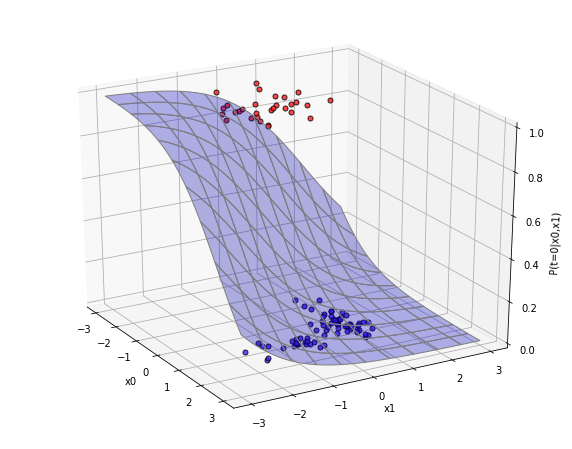

In [7]:
def logistic2(x0,x1,w):
    y = 1/(1+np.exp(-(w[0]*x0 + w[1]*x1 + w[2])))
    return y

from mpl_toolkits.mplot3d import axes3d

def show3d_logistic2(ax,w):
    xn = 50
    x0 = np.linspace(X_range0[0],X_range0[1],xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0,x1)
    y = logistic2(xx0,xx1,w)
    ax.plot_surface(xx0,xx1,y,color='blue', edgecolor='gray',
                   rstride=5, cstride=5, alpha=0.3)
    
def show_data2_3d(ax,x,t):
    c = [[1,0.1,0.1], [0.3,0.1,1]]
    for i in range(2):
        ax.plot(x[t[:,i]==1,0], x[t[:,i]==1,1], 1-i, marker='o',
               color=c[i], markeredgecolor='black', linestyle='none',
               markersize=5,alpha=0.8)
        ax.view_init(elev=25,azim=-30)
        ax.set_xlabel('x0')
        ax.set_ylabel('x1')
        ax.set_zlabel('P(t=0|x0,x1)')
        
plt.figure(figsize=(10,8))
Ax = plt.subplot(1,1,1,projection='3d')
W = [-1,-1,-1]
show3d_logistic2(Ax,W)
show_data2_3d(Ax,X,T2)
    

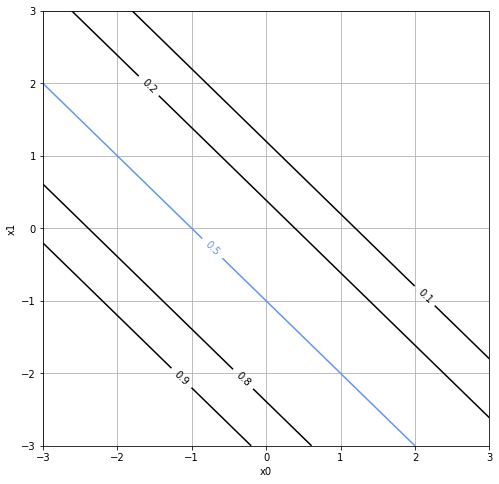

In [8]:
def show_contour_logistic2(w):
    xn = 30
    x0 = np.linspace(X_range0[0],X_range0[1],xn)
    x1 = np.linspace(X_range1[0],X_range1[1],xn)
    xx0,xx1 = np.meshgrid(x0,x1)
    y = logistic2(xx0,xx1,w)
    cont = plt.contour(xx0,xx1,y,levels=(0.1,0.2,0.5,0.8,0.9),
                      colors=['k','k','cornflowerblue','k','k'])
    cont.clabel(fmt='%.1f',fontsize=10)
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid(True)
    
plt.figure(figsize=(8,8))
W = [-1,-1,-1]
show_contour_logistic2(W)

In [17]:
def cee_logistic2(w,x,t):
    X_n = x.shape[0]
    y = logistic2(x[:,0],x[:,1],w)
    
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n,0]*np.log(y[n])+(1-t[n,0])*np.log(1-y[n]))
        if y[n] >= 0.9 :
            print("y is big")
    cee = cee/X_n
    return cee

def dcee_logistic2(w,x,t):
    X_n = x.shape[0]
    y = logistic2(x[:,0],x[:,1],w)
    dcee = np.zeros(3)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n]-t[n,0])*x[n,0]
        dcee[1] = dcee[1] + (y[n]-t[n,0])*x[n,1]
        dcee[2] = dcee[2] + (y[n]-t[n,0])
    dcee = dcee/X_n
    print(dcee.shape)
    return dcee

W = [-1,-1,-1]
dcee_logistic2(W,X,T2)
cee_logistic2(W,X,T2)

(3,)


0.3529926471563294

w0= -3.70, w1=-2.54, w2=-0.28
CEE = 0.22


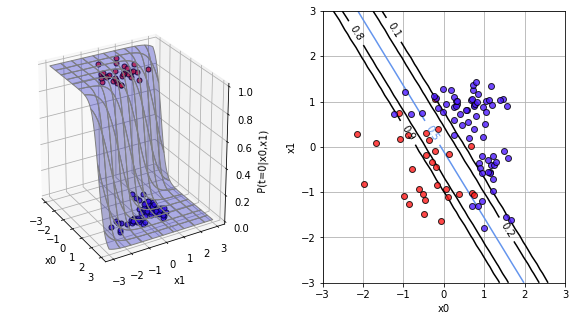

In [30]:
from scipy.optimize import minimize

def fit_logistic2(w_init,x,t):
    res = minimize(cee_logistic2,w_init,args=(x,t),
                  jac=dcee_logistic2,method="CG")
    return res.x

plt.figure(1,figsize=(10,5))
plt.subplots_adjust(wspace=0.3)

Ax = plt.subplot(1,2,1,projection='3d')
W_init = [-1, 0 , 0]
W = fit_logistic2(W_init,X,T2)
print("w0= {0:.2f}, w1={1:.2f}, w2={2:.2f}".format(W[0],W[1],W[2]))
show3d_logistic2(Ax,W)

show_data2_3d(Ax,X,T2)
cee = cee_logistic2(W,X,T2)
print("CEE = {0:.2f}".format(cee))

Ax = plt.subplot(1,2,2)
show_data2(X,T2)
show_contour_logistic2(W)
plt.show()

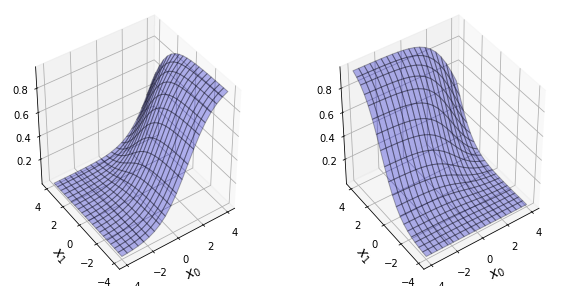

In [33]:
def softmax(x0,x1,x2):
    u = np.exp(x0) + np.exp(x1) + np.exp(x2)
    return np.exp(x0)/u, np.exp(x1)/u, np.exp(x2)/u

xn = 20
x0 = np.linspace(-4,4,xn)
x1 = np.linspace(-4,4,xn)

y = np.zeros((xn,xn,3))
for i0 in range(xn):
    for i1 in range(xn):
        y[i1,i0,:] = softmax(x0[i0],x1[i1],1)
        
xx0, xx1 = np.meshgrid(x0,x1)
plt.figure(figsize=(10,5))
for i in range(2):
    ax = plt.subplot(1,2,i+1,projection='3d')
    ax.plot_surface(xx0,xx1,y[:,:,i], rstride=1, cstride=1, alpha=0.3,
                   color='blue', edgecolor='black')
    ax.set_xlabel('$x_0$',fontsize=14)
    ax.set_ylabel('$x_1$',fontsize=14)
    ax.view_init(40,-125)
    
plt.show()

In [80]:
def logistic3(x0,x1,w):
    K = 3
    w = w.reshape((3,3))
    n = len(x1)
    y = np.zeros((n,K))
    for k in range(K):
        y[:,k] = np.exp(w[k,0]*x0 + w[k,1]*x1 + w[k,2])
    wk = np.sum(y,axis=1)
    wk = y.T/wk
    y = wk.T
    return y

W = np.array([1,2,3,4,5,6,7,8,9])
y = logistic3(X[:3,0],X[:3,1],W)
print(np.round(y,3))

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]
 [0.    0.    1.   ]
 [0.019 0.126 0.856]]


In [53]:
def cee_logistic3(w,x,t):
    X_n = x.shape[0] 
    y = logistic3(x[:,0],x[:,1],w)
    cee=0
    N,K = y.shape
    for n in range(N):
        for k in range(K):
            cee = cee - (t[n,k]*np.log(y[n,k]))
    cee = cee/X_n
    return cee

W = np.array([1,2,3,4,5,6,7,8,9])
cee_logistic3(W,X,T3)

3.9824582404787288

In [62]:
def dcee_logistic3(w,x,t):
    X_n = x.shape[0]
    y = logistic3(x[:,0],x[:,1],w)
    dcee = np.zeros((3,3))
    N,K = y.shape
    for n in range(N):
        for k in range(K):
            dcee[k,:] = dcee[k,:] - (t[n,k]-y[n,k])*np.r_[x[n,:],1]
    
    dcee=dcee/X_n
    return dcee.reshape(-1)

W = np.array([1,2,3,4,5,6,7,8,9])
dcee_logistic3(W,X,T3)
    

array([ 0.03778433,  0.03708109, -0.1841851 , -0.21235188, -0.44408101,
       -0.38340835,  0.17456754,  0.40699992,  0.56759346])

[[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
Cee = 0.23


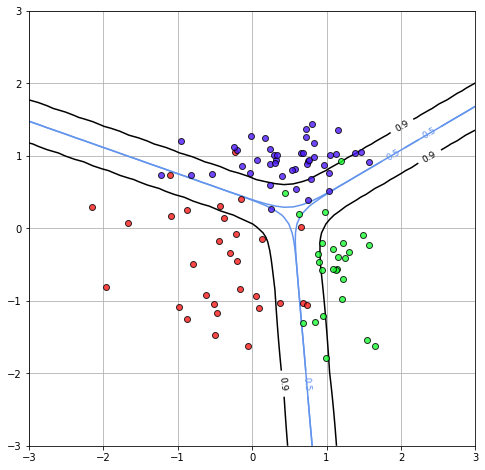

In [88]:
from scipy.optimize import minimize

def fit_logistic3(w_init,x,t):
    res = minimize(cee_logistic3,w_init,args=(x,t),
                  jac=dcee_logistic3,method="CG")
    return res.x

def show_contour_logistic3(w):
    xn = 50
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    
    xx0,xx1 = np.meshgrid(x0,x1)
    
    y = np.zeros((xn,xn,3))
    for i in range(xn):
        wk = logistic3(xx0[:,i],xx1[:,i],w)
        for j in range(3):
            y[:,i,j] = wk[:,j]
    
    for j in range(3):
        cont = plt.contour(xx0,xx1,y[:,:,j],
                          levels=(0.5,0.9),
                          colors=['cornflowerblue','k'])
        cont.clabel(fmt='%.1f',fontsize=9)
    plt.grid(True)
    
W_init = np.zeros((3,3))
W = fit_logistic3(W_init,X,T3)
print(np.round(W.reshape(3,3),2))
cee = cee_logistic3(W,X,T3)
print("Cee = {0:.2f}".format(cee))

plt.figure(figsize=(8,8))
show_data2(X,T3)
show_contour_logistic3(W)
plt.show()

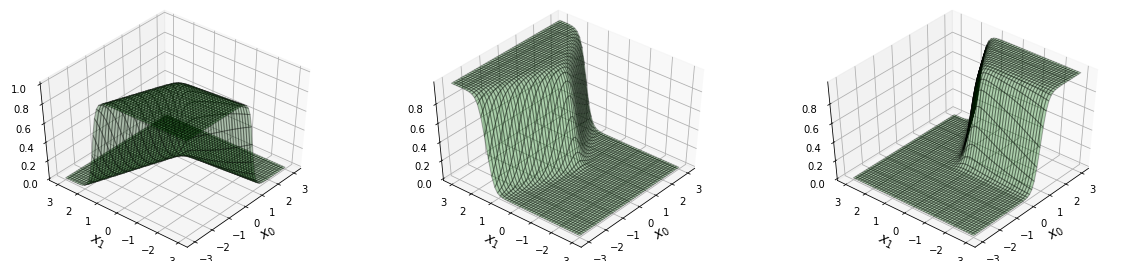

In [98]:

xx0, xx1 = np.meshgrid(x0,x1)
plt.figure(figsize=(20,10))

def show_softmax_logistic3(w):
    xn = 50
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    
    xx0,xx1 = np.meshgrid(x0,x1)
    
    y = np.zeros((xn,xn,3))
    for i in range(xn):
        wk = logistic3(xx0[:,i],xx1[:,i],w)
        for j in range(3):
            y[:,i,j] = wk[:,j]
    
    for j in range(3):
        ax = plt.subplot(2,3,j+1,projection='3d')
        ax.plot_surface(xx0,xx1,y[:,:,j],rstride=1,cstride=1,alpha=0.3,
                       color = 'green', edgecolor='black')
        ax.set_xlabel('$x_0$',fontsize=14)
        ax.set_ylabel('$x_1$',fontsize=14)
        ax.view_init(45,-140)


show_softmax_logistic3(W)
plt.show();